<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-Python/blob/main/an_isothermal_chemical_reactor_with_two_reactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title: An Isothermal Chemical Reactor with two reactions

Author: JM

Date: december 2020 


Extend the model developed in Example 2.2 (isothermal with first-order kinetics) to handle multiple reaction (assume a constant volume reactor).

$$A + B \rightarrow 2P$$

$$2A + P \rightarrow Q$$

Assume that no P is fed to the reactor. Assume that the reaction rate (generation) of A per unit volume for reaction 1 is characterizedd by expression

$$r_{A} = -k_{1}C_{A}C_{B}$$

where the minus sign indicated that A is consumed in reaction 1. Assume that the reaction rate (generation) of A per unit volume for reaction 2 is characterized by the expression

$$r_{A} = -k_{2}C_{A}C_{B}$$

If the concentrations are expressed in gmol/liter and the volume in liters. waht are the units of the reaction rate constant?

If it is desirable to know the concentration of component Q, how many equations must be solved? If our concern id only with P, how many equations must be solved? Explain.

Assume that the stoichiometric equation for this reaction is 

$$ A + B \rightarrow 2P$$

Units of reaction rate constant 

$gmol/(time*liters)$ = $units * (gmol^2/(liters*time)) \hspace{0.5cm} \rightarrow \hspace{0.5cm}units = liters/(gmol*time)$

If you want to know the concentration of Q  at time t, you will need four equations. But if you are interested in know only the concentration of P you need to write three equations. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

In [25]:
# Establish model 
def model(s,t,parms,u):

  # state variables
  V = s[0]
  a = s[1]
  b = s[2]
  p = s[3]
  q = s[4]

  # parameters
  k1 = parms[0]
  k2 = parms[1] 

  # inputs
  Fin = u[0]
  F = u[1]
  ain = u[2]
  bin = u[3]

  # material balance
  dVdt = Fin - F

  # reaction rates
  ra1 = -k1*a*b
  rb1 = ra1
  rp1 = 2*k1*a*b
  ra2 = -k2*a*p
  rp2 = ra2/2
  rq2 = k2*a*p

  # species balance
  dadt = Fin/V*(ain-a) + ra1 + ra2
  dbdt = Fin/V*(bin-b) + rb1 
  dpdt = -Fin/V*p + rp1 + rp2
  dqdt = -Fin/V*q + rq2

  return [dVdt,dadt,dbdt,dpdt,dqdt]

In [26]:
# establish parameters 
k1 = 0.01
k2 = 0.005
parms = [k1,k2]

In [27]:
# integration time
t = np.linspace(0,100,1000)

In [28]:
# establish inputs 
F = 0.5
ain = 20
bin = 30
Fin = np.ones(len(t))*0.5
Fin[500:750] = 1

In [29]:
# initial conditions 
V0 = 5
a0 = 20
b0 = 30
p0 = 0
q0 = 0
s = [V0,a0,b0,p0,q0]

In [30]:
# vectors for saving sate
V = np.ones(len(t))*V0
a = np.ones(len(t))*a0
b = np.ones(len(t))*b0
p = np.ones(len(t))*p0
q = np.ones(len(t))*q0

In [32]:
for i in range(len(t)-1):
  # update time span
  ts = [t[i],t[i+1]]
  #update input
  u = [Fin[i+1],F,ain,bin]
  # solve ODEs
  out = odeint(model,s,ts,args=(parms,u))
  # save sate
  V[i+1] = out[-1][0]
  a[i+1] = out[-1][1]
  b[i+1] = out[-1][2]
  p[i+1] = out[-1][3]
  q[i+1] = out[-1][4]
  # update initial conditions
  s = out[-1]

Text(0, 0.5, 'Fin (L/min)')

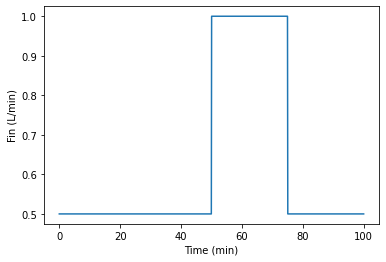

In [34]:
# show results 
plt.plot(t,Fin)
plt.xlabel("Time (min)")
plt.ylabel("Fin (L/min)")

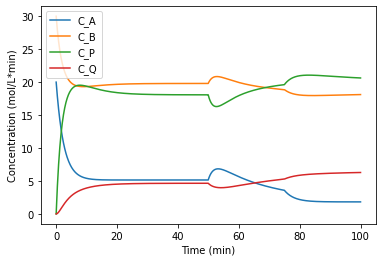

In [37]:
plt.plot(t,a,label="C_A")
plt.plot(t,b,label="C_B")
plt.plot(t,p,label="C_P")
plt.plot(t,q,label="C_Q")
plt.xlabel("Time (min)")
plt.ylabel("Concentration (mol/L*min)")
plt.legend(loc = "best")